### DAV 5400 Module 5 Assignment 

In this assignment, we're working with data about diamonds. Each section has the question that is being addressed, followed by a short explanation (ana analysis, wherever required).

We'll begin by importing the data into the notebook.

In [1]:
import pandas as pd
import numpy as np

filename = "https://raw.githubusercontent.com/manasiakre/DAV__5400/main/diamonds.xls"
diamond = pd.read_csv(filename)
print(diamond)

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]


Using the data above, we'll now answer the following questions.

#### 1. What proportion of diamonds are between .30 and 1.08 carats?

- For this, the first step would be to calculate the number of values that lie between 0.30 and 1.08 in the 'carat' column. For this, we can use 'loc' to get the required range and follow it by 'shape' to get the count of diamonds in the range.

- Since we need to calculate the proportion, the next step would be to find the total number of diamonds, which is attained by simply calculating the number of rows in the carat column.

- Proportion is calculated by using the simple math formula i.e. (x/y)*100. This will give us the proportion of diamonds that lie in the range compared to the total number of diamonds.

In [25]:
# calculate the number of values that lie between 0.30 and 1.08.
p = diamond.set_index('carat').loc[[0.30,1.08]].shape[0]
print('total no. of diamonds between 0.30 & 1.08 carats:', p)

#calculate total no. of diamonds
n = diamond.set_index('carat').shape[0]
print('total no. of diamonds:', n)

# Source - https://stackoverflow.com/questions/53147206/using-pandas-to-find-length-of-a-column-with-given-range

#calculate proportion 
proportion = ((p/n)*100)
print('proportion:', proportion)

total no. of diamonds between 0.30 & 1.08 carats: 2850
total no. of diamonds: 53940
proportion: 5.2836484983314795


#### 2. How many of the diamonds have equal x and y dimensions?

- The first thing to do is to set the condition where we can check whether values in column x is equal to column y. This can be done by comparing the two columns using '==' operator. 
- In the same line, add 'len' in the beginning to get the length (count) of the occurences where x is equal to y.

In [18]:
len(diamond[diamond['x'] == diamond['y']])

17

#### 3. How many of the diamonds have a carat less than the mean carat value?

- We'll first find the average carat value, which can be done using 'df["columnname"].mean()'.
- We'll then check for the required condition i.e. finding the no. of diamonds with carat value less than the mean, which is done using the same code as Ques 2.

In [26]:
mean_c = diamond['carat'].mean()
print("Mean carat: ", mean_c)

m = len(diamond[diamond['carat'] < mean_c])
print("No. of diamonds with carats less than the mean: ", m)

# Source - https://stackoverflow.com/questions/31037298/pandas-get-column-average-mean

Mean carat:  0.7979397478679852
No. of diamonds with carats less than the mean:  31127


#### 4. How many diamonds have a Premium cut or better? 

- We'll be working with the same code as Ques 2, and will add the 'or' (showcased by the symbol '|' in the code below) operator to put the condition to return only those counts where the diamonds have either premium or ideal cut (since the cuts are ranked in the ascending order and the only cut that is better than premium is 'ideal')

In [27]:
ip = len(diamond[(diamond['cut'] == 'Premium') | (diamond['cut'] == 'Ideal')])
print("No. of diamonds with either premium cut or better: ", ip)

No. of diamonds with either premium cut or better:  35342


#### 5. Which diamond has the highest price per carat? What is its value?

- For this, we'll first have to find the price per carat value for all diamonds. This can be done by simply dividing price by carat.
- Onc we have this data, we can now locate the diamond that has the highest price per carat value. We can use 'loc' and 'idxmax' that will give us the row label and the location of this diamond. The general format for this will be diamond.loc[row,column], where row values will be taken from price per carat data.

In [54]:
# find price per carat value for all diamonds
cp = diamond['price'] / diamond['carat']

# find diamond with highest price per carat value
#diamond.loc[row,column] - row taken from ratio column (cp), all columns considered
im = diamond.loc[cp.idxmax(),:]
mx = cp.max()
print(im)
print("Price per carat value(highest): ", mx)

carat           1.04
cut        Very Good
color              D
clarity           IF
depth           61.3
table             56
price          18542
x               6.53
y               6.55
z               4.01
Name: 27635, dtype: object
Price per carat value(highest):  17828.846153846152


#### 6.  Make a bar plot of the ‘cut’ data.

Analysis:
- Majority of the diamonds have the ideal cut, followed by premium and very good. The distribution of the frequency is interesting since better cuts are common.

Text(0, 0.5, 'frequency')

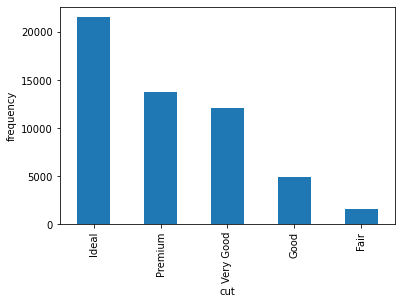

In [40]:
bar = diamond['cut'].value_counts().plot(kind = 'bar')
bar.set_xlabel("cut")
bar.set_ylabel("frequency")

#### 7. Make boxplots of the diamond price for each cut.

Analysis:
- Cut is not a good determiner when comparing the mean price. For example, the mean price of 'Ideal' cut is considerably lower than the other cuts, which is an anomaly since 'Ideal' is the best cut and should be priced higher than the rest. 
- Maybe other variables such as carat or clarity can give use a better insight into how a price of a diamond is determined.

Text(0, 0.5, 'price')

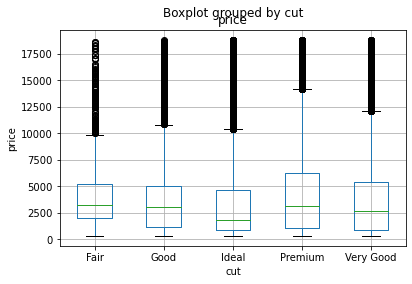

In [41]:
box = diamond.boxplot(column = 'price', by = 'cut')
box.set_xlabel("cut")
box.set_ylabel("price")

#### 8. Make histograms of the length, width, depth, and total depth attributes.

There are four seperate histograms for all the four attributes.

Analysis:

##### - Histogram x - This shows the length of the diamond.

Most of the length values lie between 4 and 5, with a right skew.

Text(0, 0.5, 'frequency')

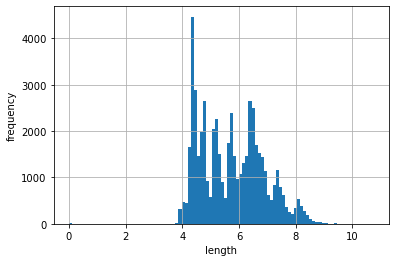

In [42]:
x = diamond['x'].hist(bins=100)
x.set_xlabel("length")
x.set_ylabel("frequency")

##### - Histogram y - This shows the width of the diamond.

Most of the width is centered around 5.

Text(0, 0.5, 'frequency')

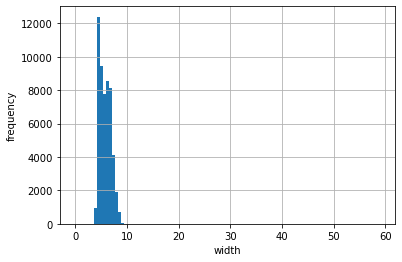

In [43]:
y = diamond['y'].hist(bins=100)
y.set_xlabel("width")
y.set_ylabel("frequency")

While both x and y independently can't tell us much, we can probably find some insights into the quality of diamonds in the data by taking x to y ration (i.e. length to width). Every shape of diamond has an ideal range. For example, a round-cut diamond has a length to width ratio between 1.0 - 1.03. 

From the histogram below, we can see that most values are centered around, showing that most diamonds in the data are somewhat round (if not perfectly), and most do have the ideal length to width ratio.

Source - https://www.diamonds.pro/guides/diamond-proportion/

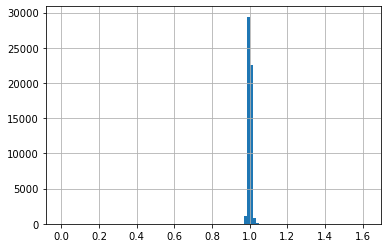

In [47]:
xy = diamond['x'] / diamond['y']
xy_plot = xy.hist(bins=100)

##### - Histogram z - This shows the depth of the diamond.

For a diamond to look radiant, the depth should neither be too shallow or too deep. It is the depth that is responsible for any refraction of light within the diamond, which is the reason behind its spark.

Most of the depth is centered around 3 with a slight right skew. Independently it can't tell us much, but when calculated with x and y (see - depth percentage), it can tell us a lot about the quality of diamonds. 

Text(0, 0.5, 'frequency')

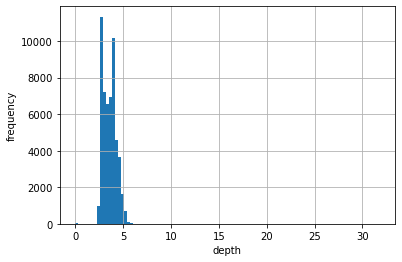

In [48]:
z = diamond['z'].hist(bins=100)
z.set_xlabel("depth")
z.set_ylabel("frequency")

##### - Histogram dep - This shows the total depth percentage of the diamond (calculate by 2 * z / (x + y))

The ideal diamond depth percentage varies from shape to shape. For example, for a round diamond, a depth between 59 and 62.6 percent is considered ideal. In the histogram below, most values are centered between 62 and 63, which doesn't tell us much except that most diamonds in the data are not exactly round (which can be confirmed by Ques 2), and that the diamonds have depths that is somewhat within the ideal range.

Source - https://www.diamonds.pro/education/diamond-depth-and-table/
https://www.withclarity.com/education/diamond-education/diamond-cut/what-is-diamond-depth-or-diamond-education

Text(0, 0.5, 'frequency')

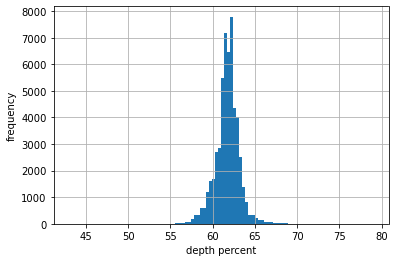

In [49]:
dep = diamond['depth'].hist(bins=100)
dep.set_xlabel("depth percent")
dep.set_ylabel("frequency")

#### Make a scatter plot of price vs. carat.

Analysis:

- As carat increases, price increases. 
- However, price variation too increases as carat increases. After 1 carat, there is high variation in the prices.
- Max price doesn't increase after 1 carat

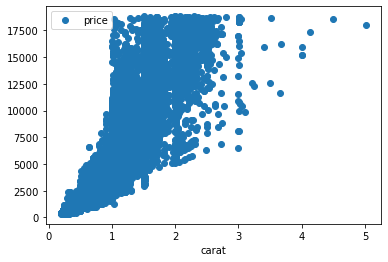

In [50]:
pc = diamond.plot(x='carat', y='price', style='o')